<a href="https://colab.research.google.com/github/amitesh197/OIBSIP/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
#CHECKING THE DISTRIBUTION OF CATEGORICAL DATA


In [ ]:
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginelocation.value_counts())
print(df.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [ ]:
#CHECKING RELATIONSHIP BETWEEN CAR NAME AND CAR PRICE


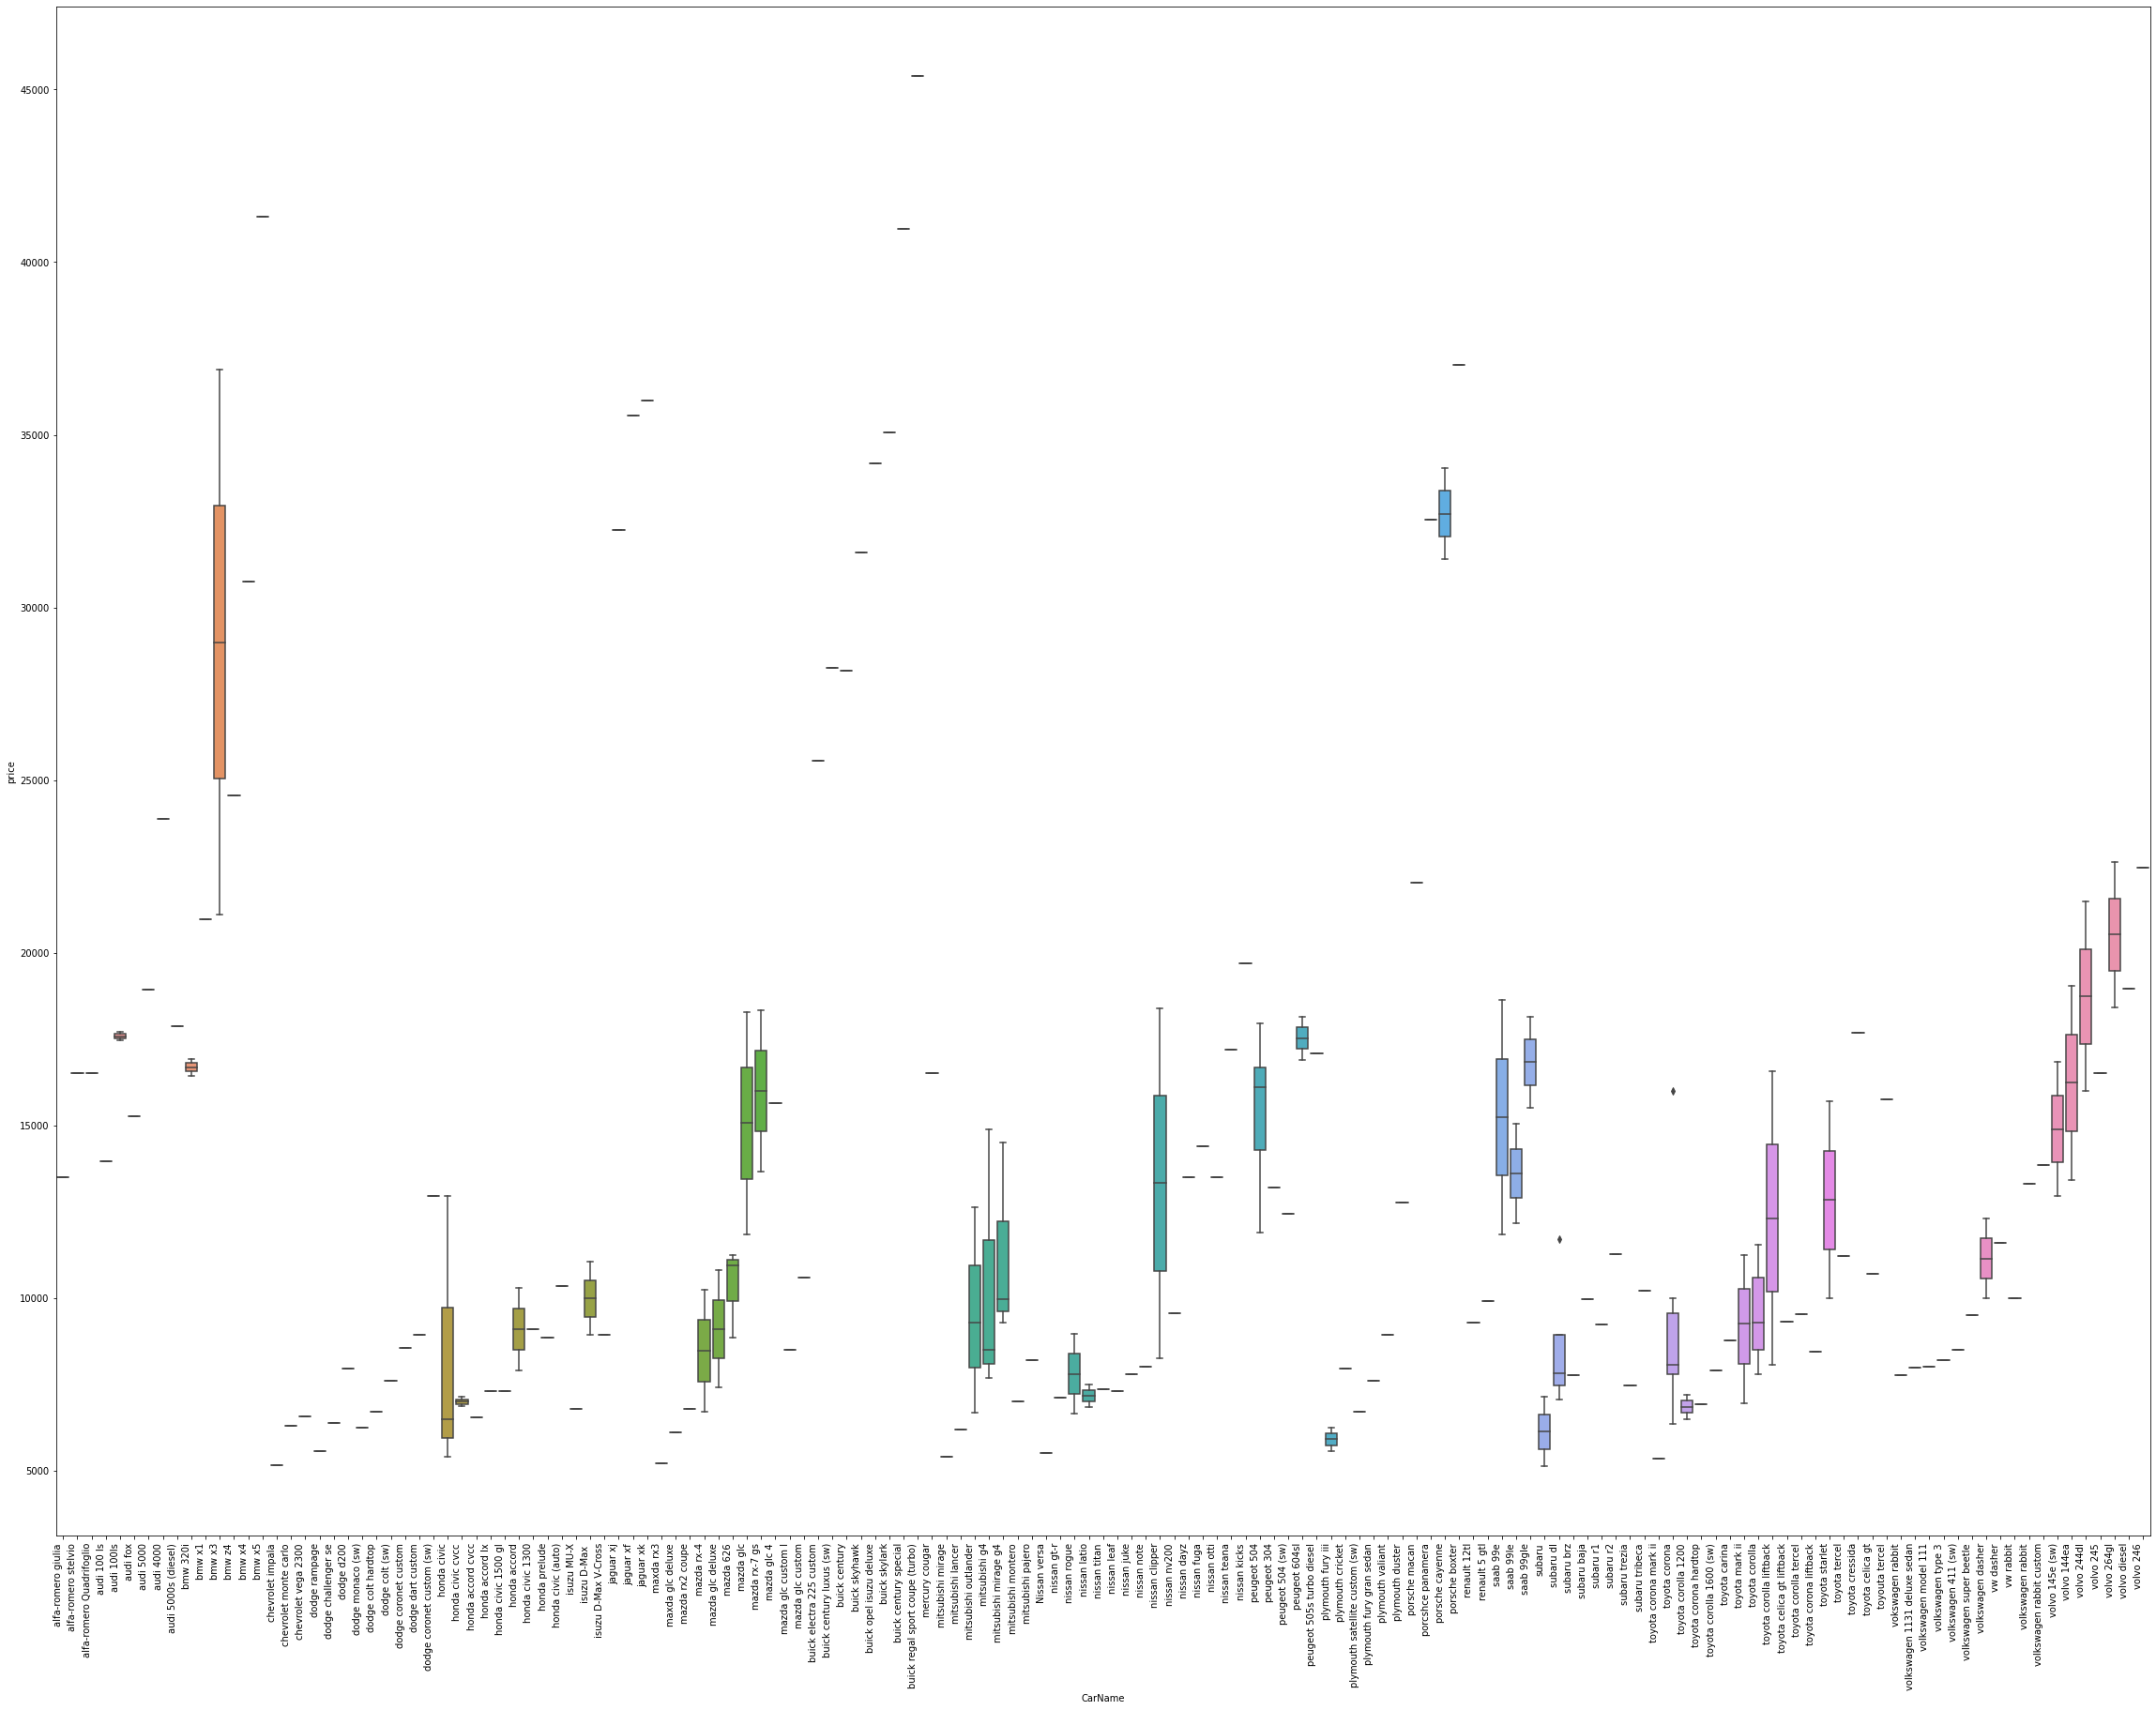

In [ ]:
plt.subplots(figsize=(40, 30))
ax = sns.boxplot(x = 'CarName', y = 'price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

In [ ]:
#CHECKING RELATIONSHIP BETWEEN FUELTYPE AND PRICE

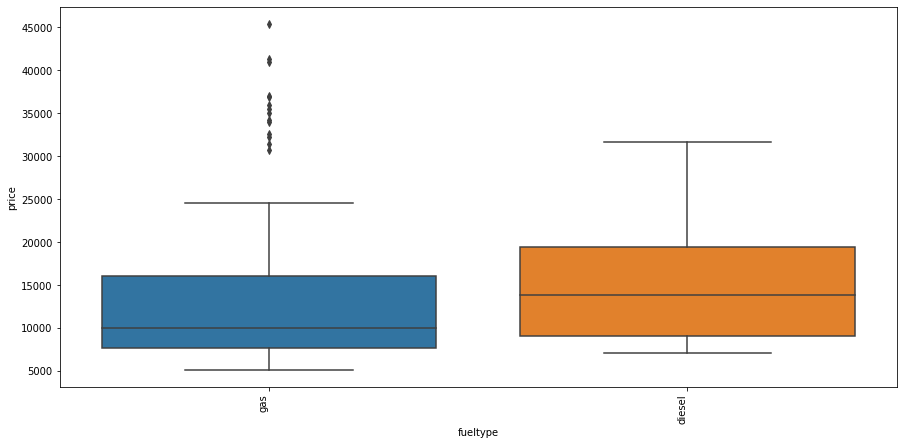

In [ ]:
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x = 'fueltype', y = 'price', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

In [ ]:
#CHECKINGRELATIONSHIP BETWEEN FUELSYSTEM AND PRICE

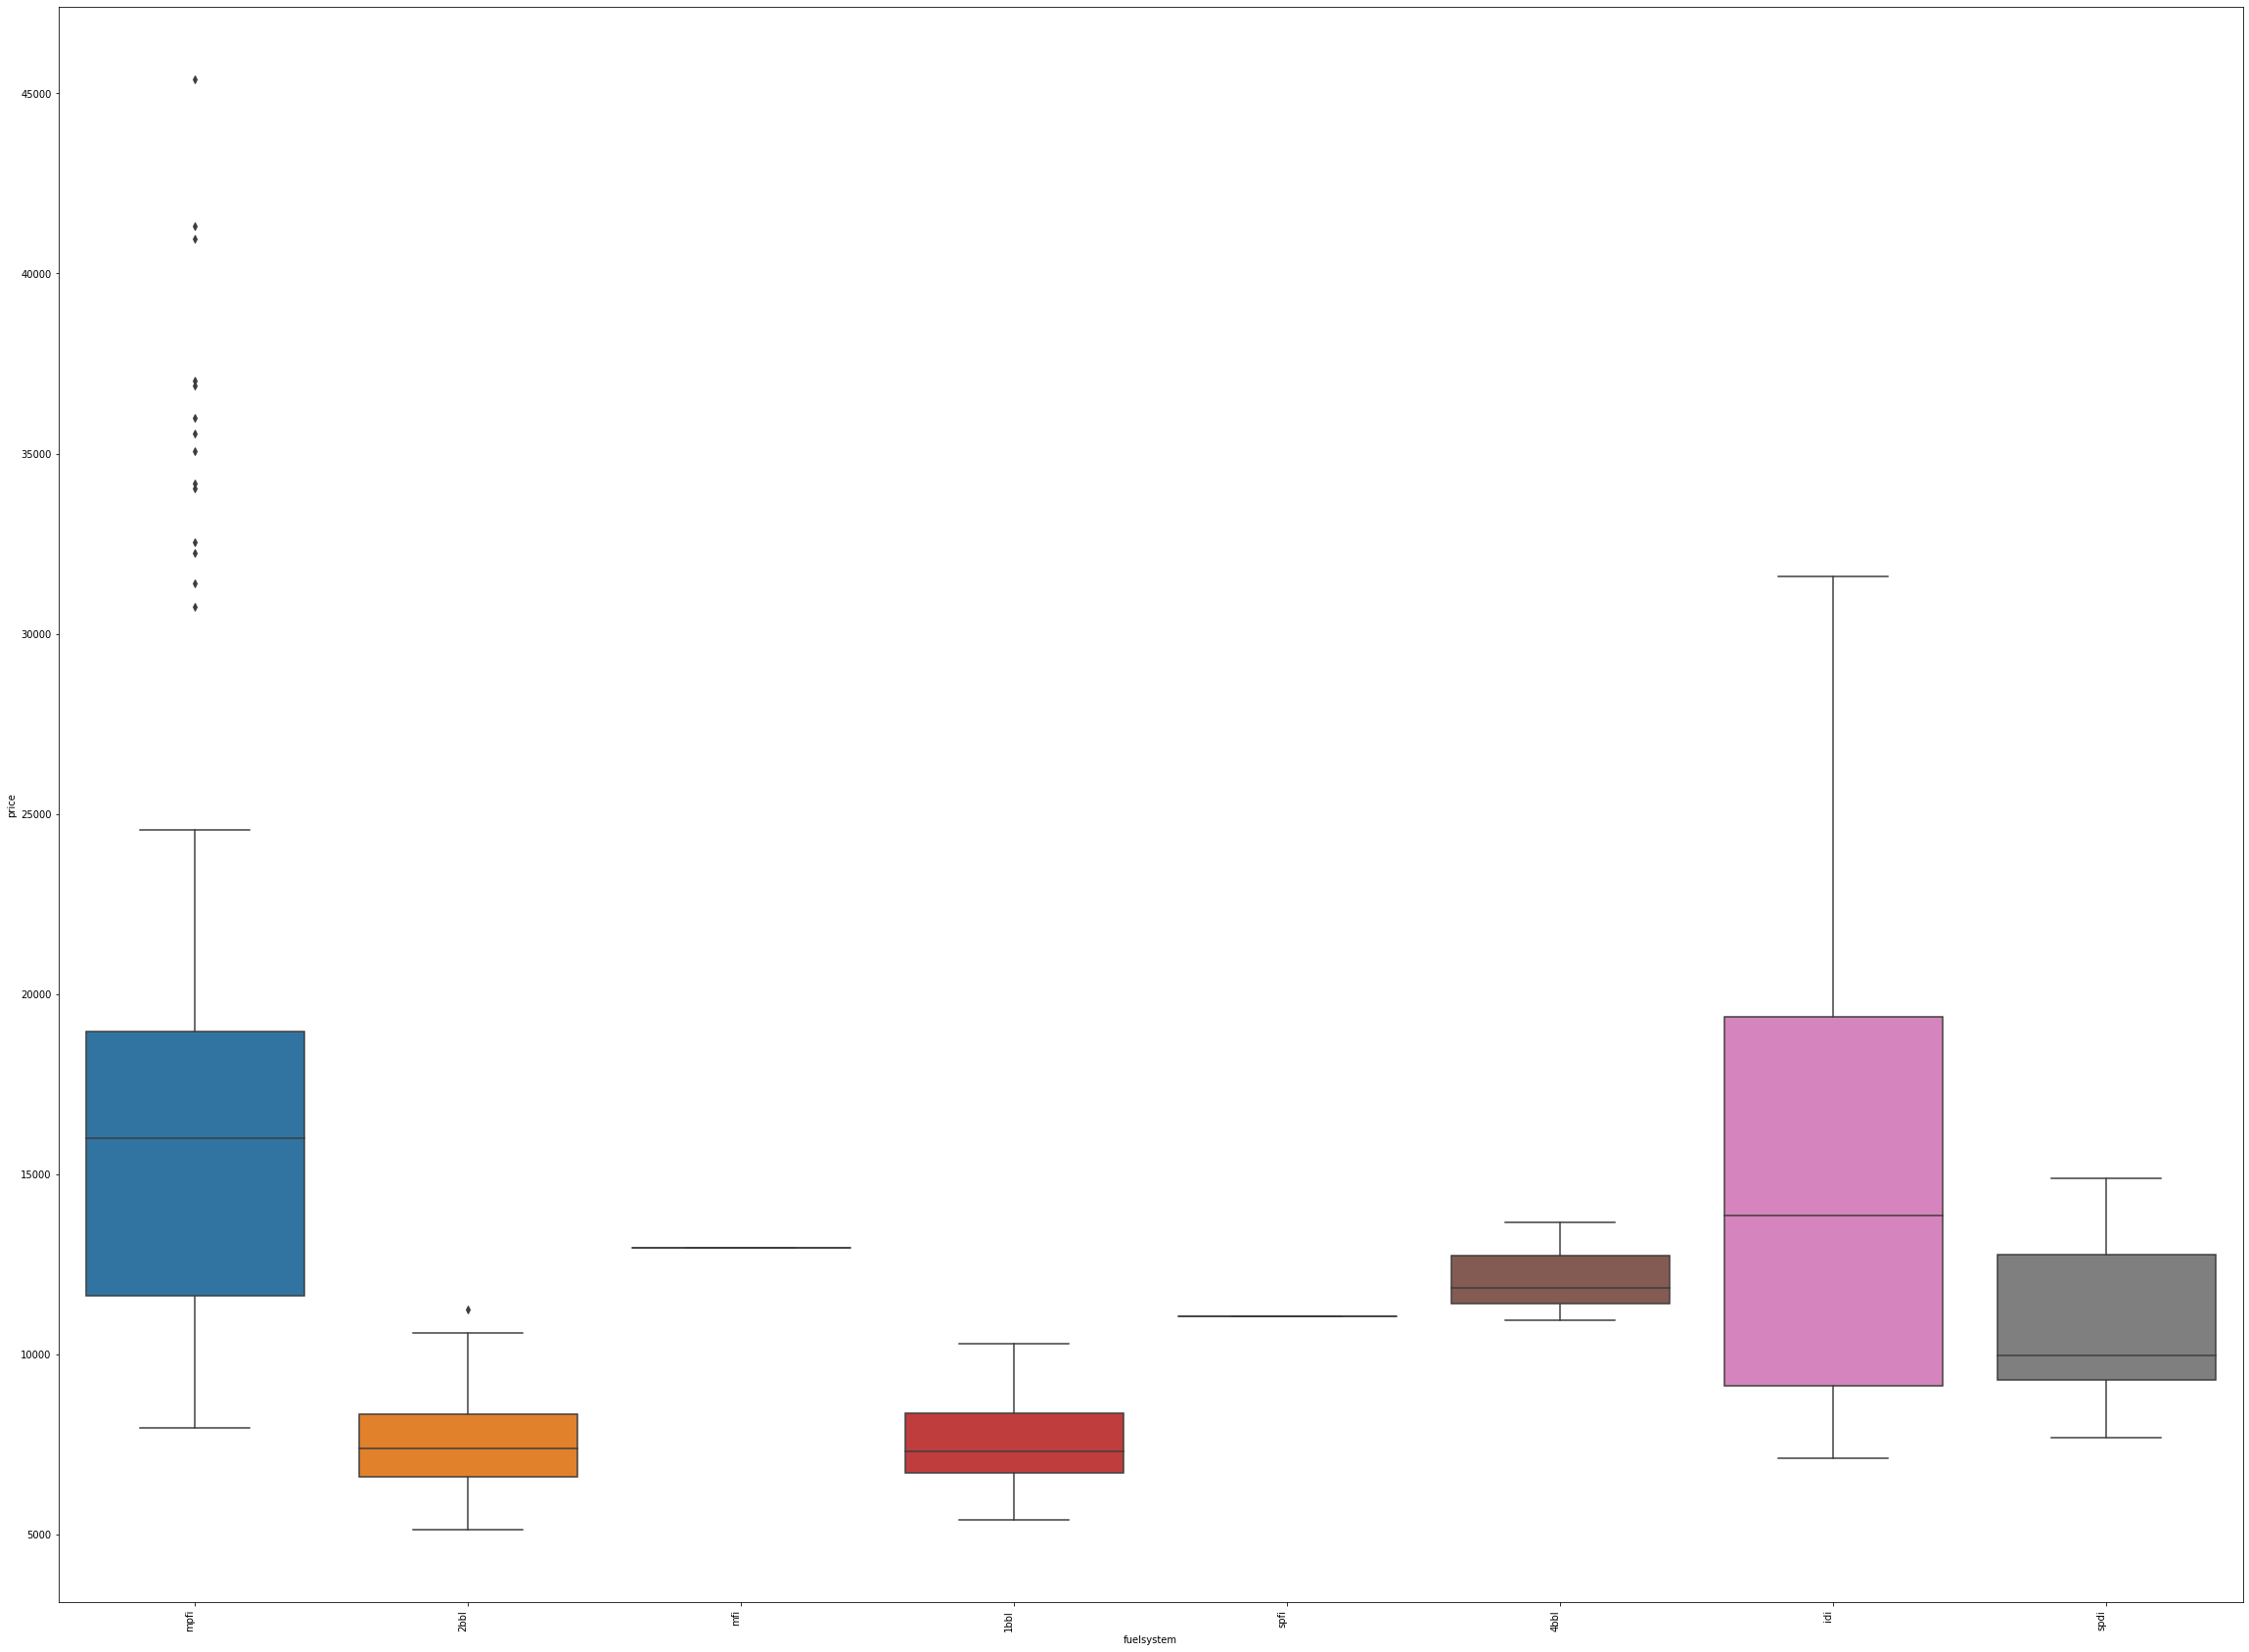

In [ ]:
plt.subplots(figsize=(40, 30))
ax = sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

In [ ]:
#CHECKING RELATIONSHIP BETWEEN ASPIRATION AND PRICE

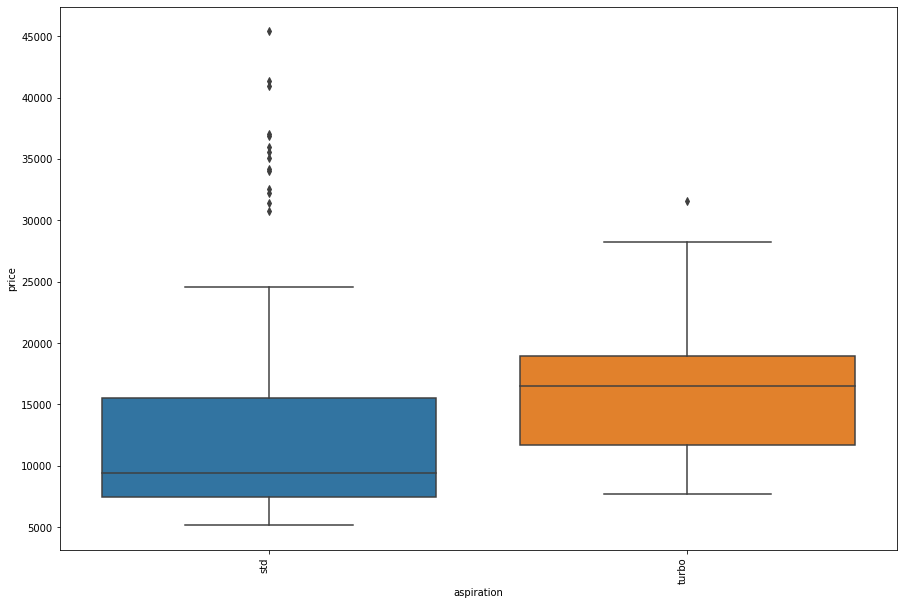

In [ ]:
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x = 'aspiration', y = 'price', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

In [ ]:
#CHECKING RELATIONSHIP BETWEEN STROKE AND PRICE

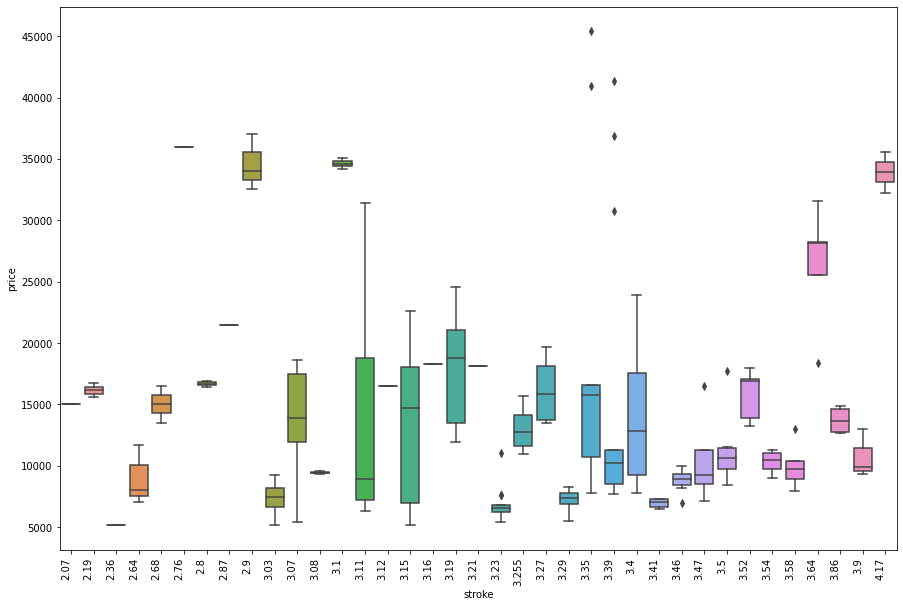

In [ ]:
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x = 'stroke', y = 'price', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

In [ ]:
#CHECKING RELATIONSHIP BETWEEN DRIVEWHEEL AND PRICE

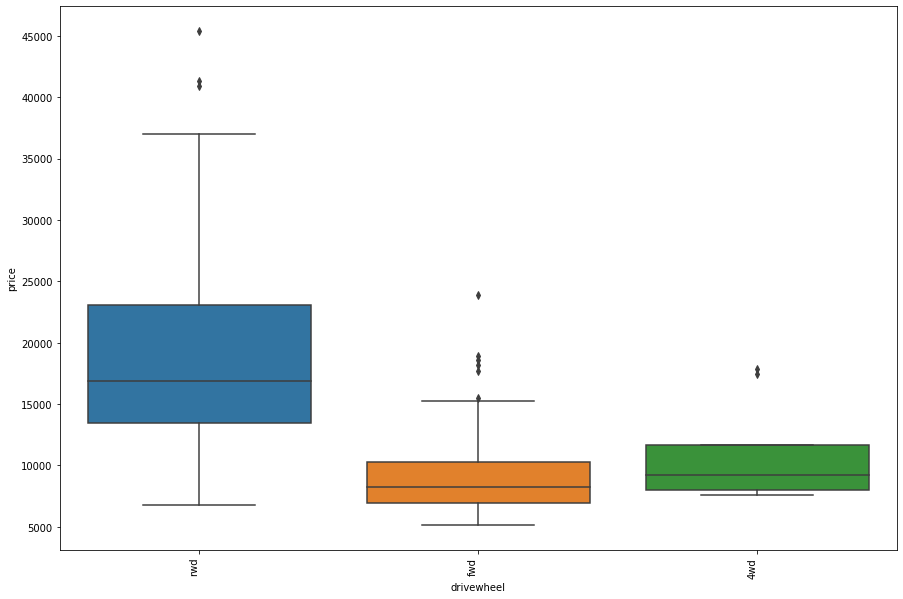

In [ ]:
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x = 'drivewheel', y = 'price', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

In [ ]:
#ONE HOT ENCODING

In [ ]:
df = pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber', 'enginelocation', 'enginetype', ])
print(df)

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING

In [ ]:
x = df.drop(['CarName', 'price'], axis=1)
y = df[['price']]

In [ ]:
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 25, random_state=50)

In [ ]:
xtrain

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
108,109,0,107.9,186.7,68.4,56.7,3197,152,3.70,3.52,...,0,0,0,0,0,1,0,0,0,0
34,35,1,93.7,150.0,64.0,52.6,1956,92,2.91,3.41,...,0,0,1,0,0,0,0,0,0,0
98,99,2,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,...,0,0,0,1,0,0,0,0,0,0
168,169,2,98.4,176.2,65.6,52.0,2536,146,3.62,3.50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,...,0,0,0,0,0,0,0,1,0,0
33,34,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,...,0,0,1,0,0,0,0,0,0,0
109,110,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,...,0,0,0,0,0,0,0,1,0,0
139,140,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
ytrain

,price
200,16845.0
108,13200.0
34,7129.0
98,8249.0
168,9639.0
...,...
132,11850.0
33,6529.0
109,12440.0
139,7053.0


In [ ]:
ytest

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


In [ ]:
#LINEAR REGRESSION

In [ ]:
lin_model = LinearRegression()
lin_model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
#TESTING DATA EVALUATION

In [ ]:
ypredtest = lin_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest, ypredtest)
print("Mean absolute error: ", Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest, ypredtest)
print("Mean squared error: ", Mean_squared_error)

Root_mean_squared_error = np.sqrt(Mean_squared_error)
print("Root mean squared error: ", Root_mean_squared_error)

RSquared = r2_score(ytest, ypredtest)
print("R-Squared: ", RSquared)

AdjRsquared = 1-((1-RSquared)*(len(xtest)-1)/(len(xtest) - len(x.columns)-1))
print("AdjRsquared: ", AdjRsquared)

Mean absolute error:  1804.9731461680192
Mean squared error:  4398357.453928538
Root mean squared error:  2097.226133236122
R-Squared:  0.9316638116092291
AdjRsquared:  1.0565540869440864


In [ ]:
x.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_

In [ ]:
ypredtest

array([[15967.51936067],
       [12475.55662401],
       [21828.07645325],
       [44105.12980431],
       [13638.35543533],
       [ 7983.31795974],
       [12452.46613642],
       [21957.16303229],
       [ 9676.50229381],
       [ 6150.41926285],
       [13661.91754031],
       [ 6435.98046961],
       [24941.57521889],
       [ 8243.14965337],
       [ 8059.33179918],
       [10393.52478781],
       [13717.07987603],
       [11430.71959801],
       [ 7959.20890537],
       [10173.50083551],
       [ 5021.48465569],
       [13988.69213092],
       [ 7497.61550078],
       [20339.41483916],
       [ 7432.33475759]])

In [ ]:
ytest

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


In [ ]:
ytest - ypredtest

,price
113,727.480639
170,-1276.556624
12,-858.076453
73,-3145.129804
145,-2379.355435
20,-1408.317960
107,-552.466136
8,1917.836968
39,-831.502294
89,-651.419263
